In [1]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
#Load the data
df=pd.read_csv('TSLA_ver1.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-01,206.210007,207.199997,198.520004,202.770004,202.770004,156852800
1,2023-03-02,186.740005,193.750000,186.009995,190.899994,190.899994,181500700
2,2023-03-03,194.800003,200.479996,192.880005,197.789993,197.789993,154193300
3,2023-03-06,198.539993,198.600006,192.300003,193.809998,193.809998,128100100
4,2023-03-07,191.380005,194.199997,186.100006,187.710007,187.710007,148125800
5,2023-03-08,185.039993,186.500000,180.000000,182.000000,182.000000,151897800
6,2023-03-09,180.250000,185.179993,172.509995,172.919998,172.919998,170023800
7,2023-03-10,175.130005,178.289993,168.440002,173.440002,173.440002,191488900
8,2023-03-13,167.460007,177.350006,163.910004,174.479996,174.479996,167790300
9,2023-03-14,177.309998,183.800003,177.139999,183.259995,183.259995,143717900


In [25]:
# Put the target for each day
df['Tomorrow'] = df["Close"].shift(-1)
df['Target'] = (df['Tomorrow'] > df["Close"]).astype(int)
df


,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
0,2023-03-01,206.210007,207.199997,198.520004,202.770004,202.770004,156852800,190.899994,0
1,2023-03-02,186.740005,193.750000,186.009995,190.899994,190.899994,181500700,197.789993,1
2,2023-03-03,194.800003,200.479996,192.880005,197.789993,197.789993,154193300,193.809998,0
3,2023-03-06,198.539993,198.600006,192.300003,193.809998,193.809998,128100100,187.710007,0
4,2023-03-07,191.380005,194.199997,186.100006,187.710007,187.710007,148125800,182.000000,0
5,2023-03-08,185.039993,186.500000,180.000000,182.000000,182.000000,151897800,172.919998,0
6,2023-03-09,180.250000,185.179993,172.509995,172.919998,172.919998,170023800,173.440002,1
7,2023-03-10,175.130005,178.289993,168.440002,173.440002,173.440002,191488900,174.479996,1
8,2023-03-13,167.460007,177.350006,163.910004,174.479996,174.479996,167790300,183.259995,1
9,2023-03-14,177.309998,183.800003,177.139999,183.259995,183.259995,143717900,180.449997,0


In [26]:
adj_close_prices = list()

#number of days
df_days= [i for i in range(1, len(df)+1)]
day= np.array(df_days)
#reshapre of the array adj_close
df_adj_close = df.loc[:,'Adj Close']
days = day.reshape(len(df),1)
    
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))
    
#create three model
lin_svr = SVR(kernel='linear', C = 1000.0)
lin_svr.fit(days, adj_close_prices)

poly_svr = SVR(kernel='poly', C = 1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C = 1000.0, gamma= 0.85)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.85)

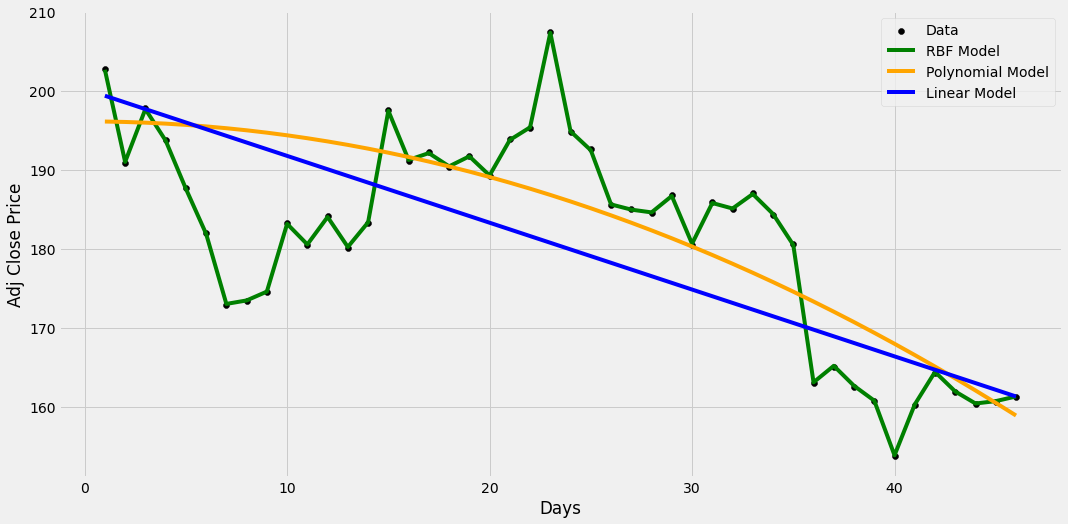

In [27]:
#Plot the model
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Data')
plt.plot(days, rbf_svr.predict(days), color='green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='blue', label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [28]:
#show the predictied price a given day
day_final = [[len(df)+1]]
print('The RBF SVR predicted price: ', rbf_svr.predict(day_final))
print('Taget prediction: ',(rbf_svr.predict(day_final) > df.at[len(df)-1,'Close']).astype(int))
print('The Linear SVR predicted price: ', lin_svr.predict(day_final))
print('Taget prediction: ',(lin_svr.predict(day_final) > df.at[len(df)-1,'Close']).astype(int))
print('The Polynomial SVR predicted price: ', poly_svr.predict(day_final))
print('Taget prediction: ',(poly_svr.predict(day_final) > df.at[len(df)-1,'Close']).astype(int))

The RBF SVR predicted price:  [174.22115813]
Taget prediction:  [1]
The Linear SVR predicted price:  [160.45371802]
Taget prediction:  [0]
The Polynomial SVR predicted price:  [157.25220676]
Taget prediction:  [0]


In [4]:
#Load the data
df=pd.read_csv('TSLA_ver1L.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-04,226.313339,227.816666,219.233337,224.533340,224.533340,89217900
1,2021-05-05,227.020004,228.433334,222.446671,223.646667,223.646667,65705700
2,2021-05-06,226.919998,227.006668,216.666672,221.179993,221.179993,83353800
3,2021-05-07,221.933334,230.000000,220.073334,224.123337,224.123337,70407600
4,2021-05-10,221.633331,221.683334,209.203339,209.679993,209.679993,94177200
...,...,...,...,...,...,...,...
500,2023-04-28,160.899994,165.000000,157.320007,164.309998,164.309998,122515800
501,2023-05-01,163.169998,163.279999,158.830002,161.830002,161.830002,109015000
502,2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700
503,2023-05-03,160.009995,165.000000,159.910004,160.610001,160.610001,119728000


In [5]:
# Put the target for each day
df['Tomorrow'] = df["Close"].shift(-1)
df['Target'] = (df['Tomorrow'] > df["Close"]).astype(int)
df


,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
0,2021-05-04,226.313339,227.816666,219.233337,224.533340,224.533340,89217900,223.646667,0
1,2021-05-05,227.020004,228.433334,222.446671,223.646667,223.646667,65705700,221.179993,0
2,2021-05-06,226.919998,227.006668,216.666672,221.179993,221.179993,83353800,224.123337,1
3,2021-05-07,221.933334,230.000000,220.073334,224.123337,224.123337,70407600,209.679993,0
4,2021-05-10,221.633331,221.683334,209.203339,209.679993,209.679993,94177200,205.733337,0
...,...,...,...,...,...,...,...,...,...
500,2023-04-28,160.899994,165.000000,157.320007,164.309998,164.309998,122515800,161.830002,0
501,2023-05-01,163.169998,163.279999,158.830002,161.830002,161.830002,109015000,160.309998,0
502,2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700,160.610001,1
503,2023-05-03,160.009995,165.000000,159.910004,160.610001,160.610001,119728000,161.199997,1


In [6]:
adj_close_prices = list()

#number of days
df_days= [i for i in range(1, len(df)+1)]
day= np.array(df_days)
#reshapre of the array adj_close
df_adj_close = df.loc[:,'Adj Close']
days = day.reshape(len(df),1)
    
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))
    
#create three model
lin_svr = SVR(kernel='linear', C = 1000.0)
lin_svr.fit(days, adj_close_prices)

poly_svr = SVR(kernel='poly', C = 1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C = 1000.0, gamma= 0.85)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.85)

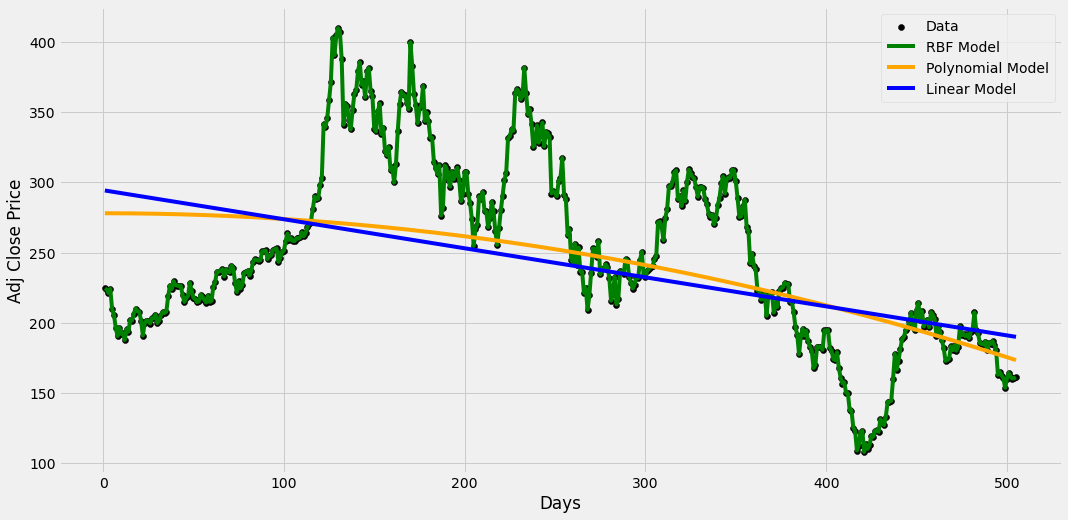

In [7]:
#Plot the model
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Data')
plt.plot(days, rbf_svr.predict(days), color='green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='blue', label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [8]:
#show the predictied price a given day
day_final = [[len(df)+1]]
print('The RBF SVR predicted price: ', rbf_svr.predict(day_final))
print('Taget prediction: ',(rbf_svr.predict(day_final) > df.at[len(df)-1,'Close']).astype(int))
print('The Linear SVR predicted price: ', lin_svr.predict(day_final))
print('Taget prediction: ',(lin_svr.predict(day_final) > df.at[len(df)-1,'Close']).astype(int))
print('The Polynomial SVR predicted price: ', poly_svr.predict(day_final))
print('Taget prediction: ',(poly_svr.predict(day_final) > df.at[len(df)-1,'Close']).astype(int))

The RBF SVR predicted price:  [217.4761702]
Taget prediction:  [1]
The Linear SVR predicted price:  [189.9166691]
Taget prediction:  [1]
The Polynomial SVR predicted price:  [173.18138965]
Taget prediction:  [1]
